<a href="https://colab.research.google.com/github/devxkrxshna/ml-projects/blob/main/14_11_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np 
import pandas as pd
import random as rd
import os
from PIL import Image


In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [59]:
#setting seed for reproducability
from numpy.random import seed
seed(25)
np.random.seed(50)

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
source="https://www.kaggle.com/code/devikrishnakr/vgg16-implementation-00b018/edit"

In [62]:
data = [] #creating a list for images
paths = [] #creating list for paths
for r, d, f in os.walk(r'/content/drive/MyDrive/Colab Notebooks/brain_mri_only_no'): #OS.walk() generate the file names in a directory tree by walking the tree, tuple (dirpath, dirnames, filenames).
    for file in f:
        if '.jpg' or '.jpeg' or '.JPG' or '.png' in file:
            paths.append(os.path.join(r, file))


In [63]:
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))

When programming a CNN, the input is a tensor with shape (number of images, (image width , image height), image depth)

Then after passing through a convolutional layer, the image becomes abstracted to a feature map, with shape (number of images, (feature map width, feature map height) , feature map channels). A convolutional layer within a neural network should have the following attributes:


* Convolutional kernels defined by a width and height (hyper-parameters).
* The number of input channels and output channels (hyper-parameter).
* The depth of the Convolution filter (the input channels) must be equal to the number channels (depth) of the input feature map.




In [64]:
data = np.array(data)
print('data shape is:', data.shape) ##we have 79 images with 128 height, 128 weight, RGB color channel



data shape is: (79, 128, 128, 3)


In [65]:
#data=data.reshape(79,3,128,128)
#print('data shape is:', data.shape)

In [66]:
#Each pixel has a value between 255 and 0. We will reduce this down to 1 and 0 in order to help the neural network converge quicker.
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))


#reducing the data to between 1 and 0
data = data / 255.00
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))

#print(data)

255
0
1.0
0.0


In [67]:
images = torch.from_numpy(data) #converting array to tensor



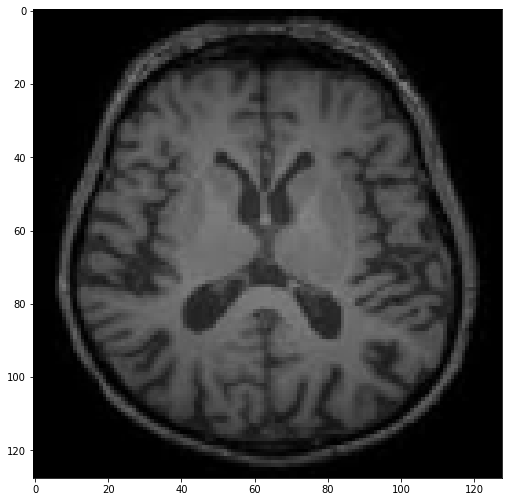

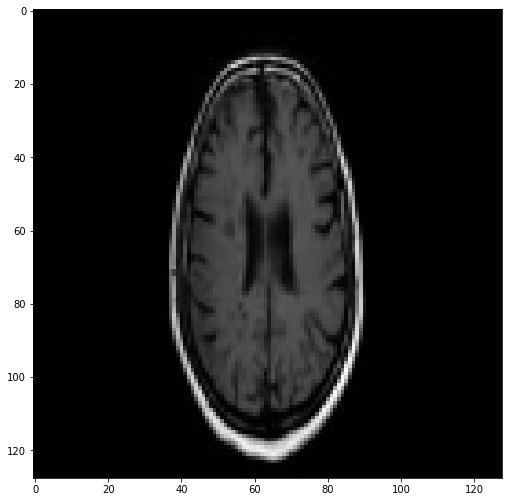

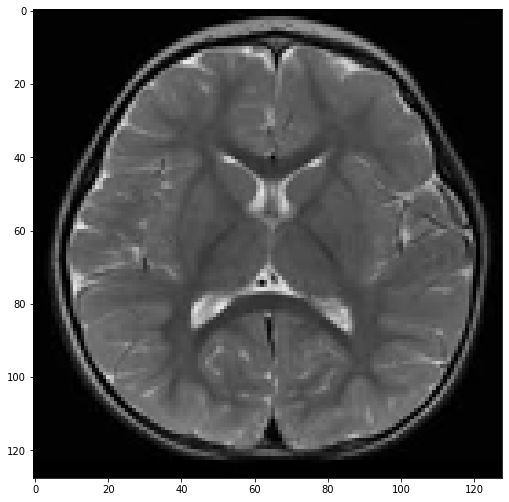

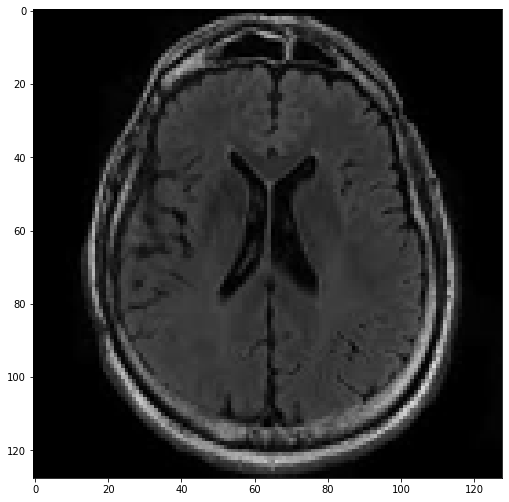

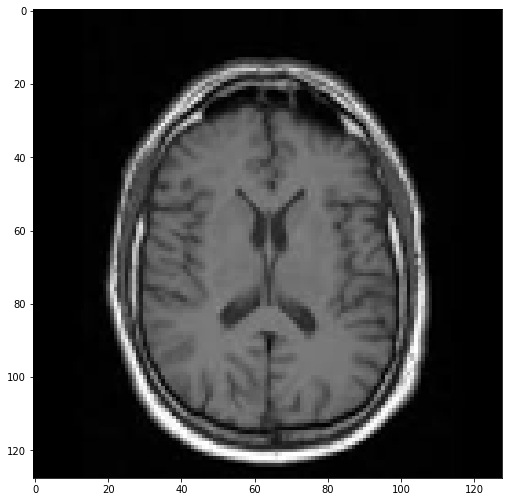

In [68]:
for i in range(5):
    fig = plt.figure(figsize=(50,50))
    plt.subplot(5,5,i+1)
    image = plt.imshow(images[i])
    plt.show(image)

# CNN
A convolutional neural network (CNN) consists of an input and an output layer, as well as multiple hidden layers. The hidden layers of a CNN typically consist of a series of convolutional layers that convolve with a multiplication or other dot product. The activation function is commonly a REctified Linear Unit (RELU) layer, and is subsequently followed by additional convolutions such as pooling layers, fully connected layers and normalization layers, referred to as hidden layers because their inputs and outputs are masked by the activation function and final convolution. The final convolution, in turn, often involves backpropagation in order to more accurately weight the end product.